# Unsupervised Learning + Model Evaluation

**Goal: predict the Body Mass from the other columns.**

In [5]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/penguins_simple.csv', sep=';')
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

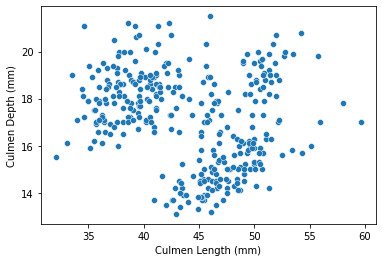

In [4]:
sns.scatterplot(data=df, x='Culmen Length (mm)', y='Culmen Depth (mm)')

In [8]:
train, test = train_test_split(df, random_state=777)
train.shape, test.shape

((249, 6), (84, 6))

### K-Means Clustering

* clusters are spherical
* all clusters have the same size
* every cluster has a center point
* you set the number of clusters before

In [62]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [106]:
df.columns

Index(['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
      dtype='object')

In [107]:
X = train
X.shape

(249, 8)

In [108]:
col = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='error', drop='first'), ['Species', 'Sex']),
    ('scale', MinMaxScaler(), ['Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)'])
])

In [109]:
col.fit(X)
Xt = col.transform(X)
Xt.shape

(249, 7)

In [110]:
Xt[0]

array([1.        , 0.        , 0.        , 0.48594378, 0.55952381,
       0.44067797, 0.34722222])

In [111]:
km = KMeans(n_clusters=3)
km.fit(Xt)
km.cluster_centers_

array([[-1.66533454e-16,  1.00000000e+00,  4.89130435e-01,
         5.75475816e-01,  2.17003106e-01,  7.60501105e-01,
         6.58589976e-01],
       [ 3.24675325e-01, -2.77555756e-16,  1.00000000e+00,
         4.29979659e-01,  7.26035869e-01,  3.81906229e-01,
         3.63005051e-01],
       [ 3.37500000e-01, -3.33066907e-16, -1.66533454e-16,
         2.93724900e-01,  5.47916667e-01,  2.99788136e-01,
         2.07204861e-01]])

In [81]:
clusters = km.predict(Xt)

In [82]:
clusters

array([0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2,
       1, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 0,
       1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 1, 0, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0,
       1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0,
       1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 1,
       2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 0, 1,
       0, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 1,
       2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 0, 2, 2, 2, 1, 0], dtype=int32)

In [83]:
train = train.copy()
train['cluster'] = clusters

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Body Mass (g)'>

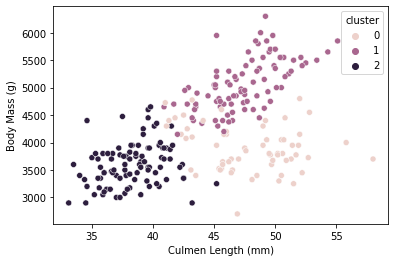

In [84]:
sns.scatterplot(data=train, x='Culmen Length (mm)', y='Body Mass (g)', hue='cluster')

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

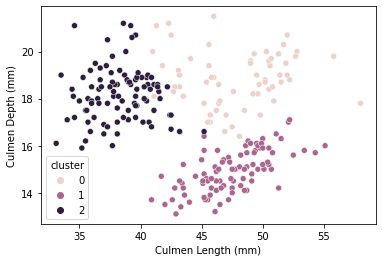

In [85]:
sns.scatterplot(data=train, x='Culmen Length (mm)', y='Culmen Depth (mm)', hue='cluster')

#### Caveat:

* clustering with Euclidean distance does not work well with many features

### Evaluation metrics
* silhouette score: describes the overall shape of the cluster (penalizes large surface)
* compare to a reference set (e.g. Species)
* calculate clusters for different hyperparameters and compare some metric

### DBSCAN clustering

* you get the number of clusters as a result
* two hyperparameters: 
  * minimum # points belonging to a cluster
  * maximum distance for two points in the same cluster (eps)
* finds outliers (-1)

In [86]:
from sklearn.cluster import DBSCAN

In [100]:
m = DBSCAN(eps=0.13, min_samples=5, metric='euclidean')
m.fit(Xt)
train['dbscan'] = m.fit_predict(Xt)

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

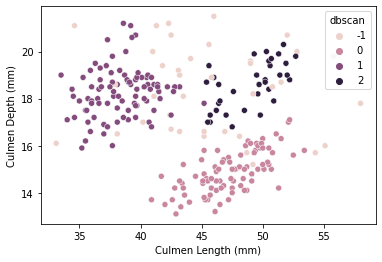

In [101]:
sns.scatterplot(data=train, x='Culmen Length (mm)', y='Culmen Depth (mm)', hue='dbscan')

### Distance Metrics:

* euclidean : works well only <10 features
* manhattan : works well only <10 features
* cosine similarity : angle between two vectors, good for large number of features
* Jaccard distance / Tanimoto score : for large numbers of binary columns

----

## Principal Component Analysis (PCA)

In [115]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [112]:
Xt.shape

(249, 7)

<AxesSubplot:>

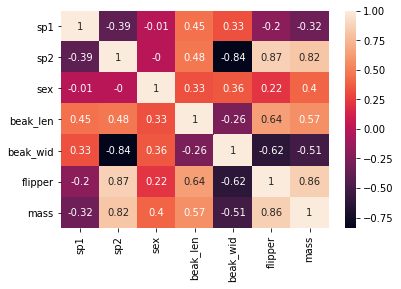

In [122]:
# we measure statistical dependence of features with correlation coefficients
# 1.0 = identical, 0.0 = independent
sns.heatmap(pd.DataFrame(Xt, columns=['sp1', 'sp2', 'sex', 'beak_len', 'beak_wid', 'flipper', 'mass']).corr().round(2), annot=True)

In [116]:
# we need to have a mean of zero for PCA
sc = StandardScaler()
Xs = sc.fit_transform(Xt)

In [126]:
pca = PCA(n_components=7)
Xp = pca.fit_transform(Xs)
Xp.shape

(249, 7)

PCA performs a linear transformation. All the features get transformed into new features.

<AxesSubplot:>

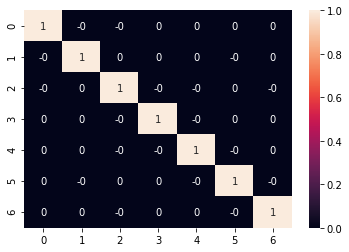

In [124]:
# the output data of the PCA are *orthogonal* or *independent* features
# --> super important for linear models
sns.heatmap(pd.DataFrame(Xp).corr().round(2), annot=True)

the output features of the PCA are *ranked* : the first feature is the most important one, the second feature is the second is the second most important etc.

In [127]:
# we can use only the most representative features -> Dimensionality Reduction
# --> models can be trained faster
# --> we avoid overfitting

## Disadvantage: we don't know what the new features after PCA mean (no labels)

<AxesSubplot:>

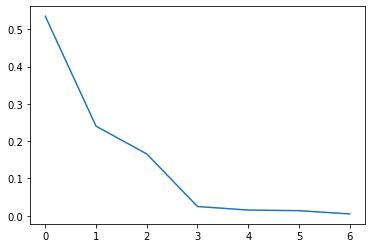

In [128]:
# how many components to use?
pd.Series(pca.explained_variance_ratio_).plot()
# first new feature explains 50% of the variance in the data
# second new feature explains 25% of the variance
# features 3-6 only explain noise, we can remove them

### What to use PCA for?

* use the output as an input for further modeling (as a preprocessing step)
* use the output for plotting / clustering to explore the shape

<AxesSubplot:xlabel='0', ylabel='1'>

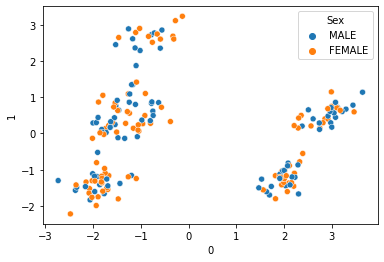

In [132]:
sns.scatterplot(data=pd.DataFrame(Xp), x=0, y=1, hue=train['Sex'])

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

### Clean Pipeline

In [140]:
col = ColumnTransformer([
    # check Andreas Müllers scikit videos on this
    # for how to write your own preprocessors
    ('onehot', OneHotEncoder(handle_unknown='error', drop='first'), ['Species', 'Sex']),
    ('scale', 'passthrough', ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)'])
])

In [174]:
pipeline = make_pipeline(
    col,
    StandardScaler(),
    PCA(n_components=4),
    LinearRegression()
)

In [175]:
Xtrain = train.iloc[:, :-2]
ytrain = train['Body Mass (g)']

pipeline.fit(Xtrain, ytrain)
ypred_train = pipeline.predict(Xtrain)

### How to debug/inspect models

In [176]:
Xtrain.shape

(249, 6)

In [177]:
# 1. validation score (should be easy with a pipeline)
Xval = test
yval = test['Body Mass (g)']

## NEVER FIT ANYTHING ON val/test DATA!!! pipeline.fit(Xval, yval)
ypred_val = pipeline.predict(Xval)

In [178]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [179]:
mean_squared_error(ytrain, ypred_train)

86601.98404051967

In [180]:
mean_squared_error(yval, ypred_val)

83712.52024878417

In [181]:
mean_absolute_error(ytrain, ypred_train).round() # g in penguin weight

238.0

In [182]:
mean_absolute_error(yval, ypred_val).round()

238.0

In [183]:
# 2. cross-validation
#    good rule of thumb, 5x training time
from sklearn.model_selection import cross_validate

cv = cross_validate(pipeline, Xtrain, ytrain,
                    cv=5,
                    scoring='neg_mean_absolute_error',
                    return_train_score=True
)
pd.DataFrame(cv).round()

,fit_time,score_time,test_score,train_score
0,0.0,0.0,-287.0,-226.0
1,0.0,0.0,-227.0,-239.0
2,0.0,0.0,-251.0,-234.0
3,0.0,0.0,-235.0,-240.0
4,0.0,0.0,-232.0,-239.0


In [184]:
# look for:
# - big differences between test/train scores in the same row (e.g. overfitting)
# - lots of variation in the same column


<AxesSubplot:>

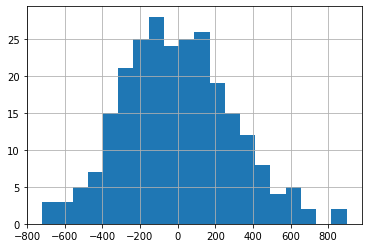

In [185]:
# 3. examine residuals (errors)
#    (in classification: inspect some misclassified points)
residual = ytrain - ypred_train
residual.hist(bins=20)
# what are the biggest/smallest errors?
# is it a gaussian distribution

<AxesSubplot:xlabel='Body Mass (g)', ylabel='residual'>

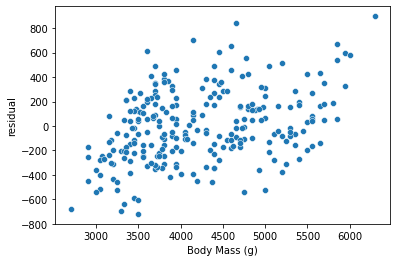

In [188]:
# look for dependence of the errors with some feature (e.g. time in a time series)
train['residual'] = residual
sns.scatterplot(data=train, y='residual', x='Body Mass (g)')
# are the residuals distributed evenly?

In [ ]:
# 4. in linear regression, check other assumptions
#    (includes some statistical tests and more plots)
#    in time series you *must* check for autocorrelation

In [ ]:
# 5. bootstrapping
#    (resamples the dataset 100-1000 times) -> takes much more training time
#    gives you a reliable estimate of your training/test score with confidence interval
#    -> do this at the very end of a training with the test data

In [190]:
# 6. inspect the influence of different features
#    linear regression: check coefficients directly
#    better output with statsmodels (p-values and confidence intervals for each coefficient)
pipeline.named_steps['linearregression'].coef_

array([ 385.81212728,  117.1842864 , -255.89488976,  146.92196099])

In [ ]:
# "1 cm of beak length means 385 g of penguin weight"

In [ ]:
#    random forest / boosting
#    - m.feature_importance_
#    - Shapley values (in catboost)